# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Bendejo, Kevin\
_Student No._:2022-08528\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 04,2024 11:50pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:Kevin Bendejo**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**50/50**</font>
* Problem 2 - <font color='red'>**50/50**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

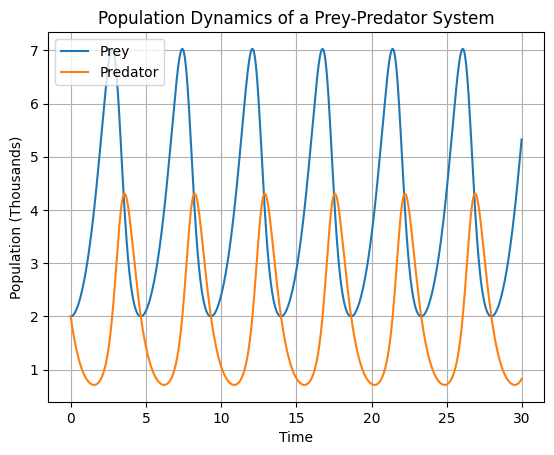

In [25]:
#Solving the Lotka-Volterra Equeations using 4th-order Runge-Kutta Method
from math import sin
from numpy import arange, array
from pylab import plot, xlabel, ylabel, show, grid, title, legend

#Assigning the given values for the parameters
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

#Defining the function f(r,t) that represents the Lotka-Volterra equations
def f(r,t):
  x = r[0]
  y = r[1]
  fx = alpha*x - beta*x*y #the differential equation for the "prey"
  fy = gamma*x*y - delta*y #the differential equation for the "predetor"
  return array([fx,fy],float) #outputs an array with function fx and fy as the elements

a = 0.0   #initial value of time
b = 30.0  #final value of time
N = 1000    #number of steps
h = (b-a)/N   #width of each step

tpoints = arange (a,b,h) #assigning tpoints as an array of evenly h-spaced digits starting from a up to b
xpoints = []            # assigning xpoints to an empty array to be filled later
ypoints = []            # assigning ypoints to an empty array to be filled later

#initial values of x and y
r = array([2.0,2.0], float) #defining r as a 1x2 array whose elements are the initial values for x and y

for t in tpoints:       # for the element t in tpoints the following will be run
  xpoints.append(r[0])  # adding the 1st element of r to the array xpoints
  ypoints.append(r[1])  # adding the 2nd element of r the array to ypoints

 #4th-order Runge-Kutta equations
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1, t+0.5*h)
  k3 = h*f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6
#plots tpoints as the x component and xpoints(ypoints) as the y component
plot(tpoints, xpoints, label="Prey")
plot(tpoints, ypoints, label="Predator")
title("Population Dynamics of a Prey-Predator System")
xlabel("Time (units)")
ylabel("Population (Thousands)")
legend()
grid()
show()

The parameter alpha represents the growth rate of the prey without the influence of predators. The beta parameter on the other hand represents the death rate of the prey due to the predation of the predators

The gamma parameter represents the growth rate of the predators in relation to the number of prey present. The delta parameter on the other hand represents the death rate of the predators due to old age


The graph shows that, for the parameters α=1, β=γ=0.5, and δ=2 with initial conditions x=y=2, the population of preys will first increase due to the low number of predators and will soon decrease once the population of the predators reach a certain point. A high prey population will eventually lead to a high predator population (not simultaneous). The high predator population will then lead to a low prey population which in turn lowers the population of the predators. In general, the graph shows the cyclic dynamics of prey and predator population.

<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 25/25 </font>

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


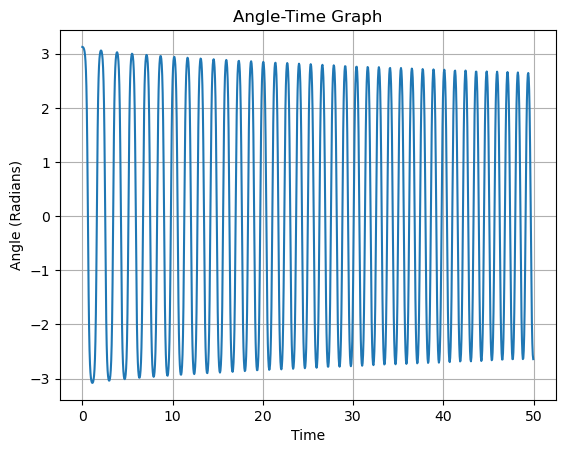

In [3]:
from math import sin, pi
from numpy import arange, array
from pylab import plot, xlabel, ylabel, show, grid, title, legend

#assigning the value of constants
g = 9.81 #gravitaional acceleration (m/s^2)
l = 0.1  #arm length of the pendulum (m)

#Defining the function f(r,t) that describes the motion of the nonlinear pendulum
def f(r,t):
  theta = r[0] #initial value of angle
  omega = r[1] #initial value of angular velocity
  ftheta = omega #equation for time derivative of angle (theta)
  fomega = -(g/l)*(sin(theta)) #equation for the time derivative of angular velocity (omega)
  return array([ftheta,fomega],float)

a = 0.0 #initial value of time
b = 50.0 #final value of time
N = 1000 #number of steps
h = (b-a)/N #width of the steps

tpoints = arange (a,b,h) #assigning tpoints as an array of evenly h-spaced digits starting from a up to b
thetapoints = []         #assigning thetapoints to an empty array to be filled later
omegapoints = []         #assigning omegapoints to an empty array to be filled later

#initial value for theta and omega
r = array([179.0*pi/180,0.0],float)

#Executing the 4th-order Runge-Kutta Method
for t in tpoints: # for the element t in tpoints the following will be run
  thetapoints.append(r[0]) # adding the 1st element of r to the array thetapoints
  omegapoints.append(r[1]) # adding the 2nd element of r to the array omegapoints

 #4th-order LRunge-Kutta equations
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1, t+0.5*h)
  k3 = h*f(r+0.5*k2, t+0.5*h)
  k4 = h*f(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6 

#plotting the result
plot(tpoints, thetapoints)
title ("Angle-Time Graph")
xlabel("Time (s)")
ylabel("Angle (Radians)")
grid()
show()

The result shows that the pendulum is losing energy since the amplitude of the wave decreases as t increases. Theoretically, the graph must maintain its amplitude since there is no damping force present in the equation. This represents a more realistic motion of a pendulum.


<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 25/25 </font>